Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)


# Paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from pandas_datareader import wb

# Identificando indicadores

Hay muchos indices disponibles y segmentados, aqui usaremos totales

In [2]:
wb.get_countries()

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
291,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
292,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.3520
293,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
294,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.3982


In [4]:
indicadores_desempleo = wb.search('Unemployment')
indicadores_desempleo.query('id=="SL.UEM.TOTL.ZS"')

,id,name,unit,source,sourceNote,sourceOrganization,topics
17520,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",,World Development Indicators,Unemployment refers to the share of the labor ...,b'International Labour Organization. ILO Model...,Education ; Social Protection & Labor


# Importando datos

In [5]:
paises = ['PE', 'BO','CL']

In [6]:
inicio = 1995

## Desempleo

In [7]:
desempleo = wb.download(indicator='SL.UEM.TOTL.ZS',
country=paises,start=inicio, end=2022)

<ipython-input-7-1bd8d4dc2c5f>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  desempleo = wb.download(indicator='SL.UEM.TOTL.ZS',


<ipython-input-18-ebaeeef71c04>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  desempleo = wb.download(indicator='SL.UEM.TOTL.ZS',country=paises,start=inicio, end=2022)


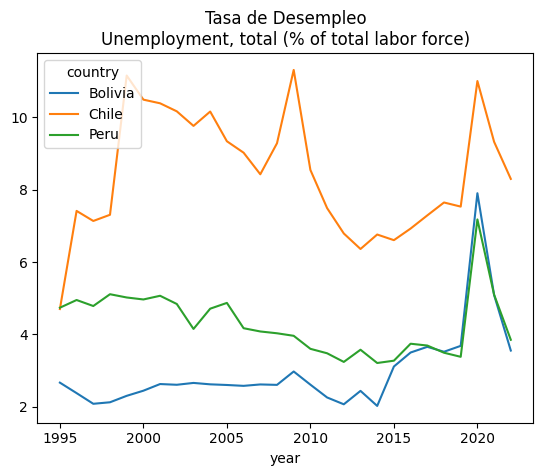

In [18]:
desempleo = wb.download(indicator='SL.UEM.TOTL.ZS',country=paises,start=inicio, end=2022)
#datos
desempleo = desempleo.reset_index().pivot_table(index='year',columns='country',values='SL.UEM.TOTL.ZS')
desempleo.index = pd.to_numeric(desempleo.index)
desempleo.plot()
plt.title('Tasa de Desempleo\nUnemployment, total (% of total labor force)')
plt.show()

## Inflación

In [19]:
indicadores_inflacion = wb.search('Consumer Price')
indicadores_inflacion.query('id=="FP.CPI.TOTL.ZG"')

,id,name,unit,source,sourceNote,sourceOrganization,topics
6916,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",,World Development Indicators,Inflation as measured by the consumer price in...,"b'International Monetary Fund, International F...",Economy & Growth ; Financial Sector


<ipython-input-20-76ab4488bf85>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  inflacion = wb.download(indicator='FP.CPI.TOTL.ZG',


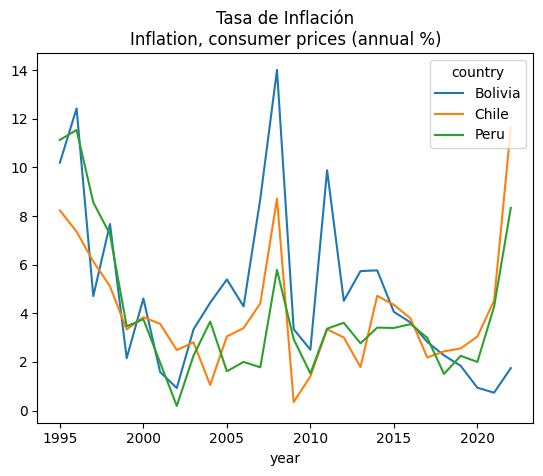

In [20]:
inflacion = wb.download(indicator='FP.CPI.TOTL.ZG',
country=paises,start=inicio, end=2022)
#datos
inflacion = inflacion.reset_index().pivot_table(index='year',columns='country',values='FP.CPI.TOTL.ZG')
inflacion.index = pd.to_numeric(inflacion.index)
inflacion.plot()
plt.title('Tasa de Inflación\nInflation, consumer prices (annual %)')
plt.show()

# Analizando en conjunto

## Generando data unida

In [21]:
df_combined = pd.merge(desempleo.reset_index().melt(id_vars=['year'], var_name='country', value_name='desempleo'),
                       inflacion.reset_index().melt(id_vars=['year'], var_name='country', value_name='inflacion'),
                       on=['year', 'country'])

print(df_combined)

    year  country  desempleo  inflacion
0   1995  Bolivia      2.665  10.193207
1   1996  Bolivia      2.375  12.425487
2   1997  Bolivia      2.080   4.708444
3   1998  Bolivia      2.122   7.673229
4   1999  Bolivia      2.300   2.159516
..   ...      ...        ...        ...
79  2018     Peru      3.492   1.509154
80  2019     Peru      3.379   2.252122
81  2020     Peru      7.179   2.002412
82  2021     Peru      5.097   4.271664
83  2022     Peru      3.850   8.333706

[84 rows x 4 columns]


## Modelando curva de Phillips

In [22]:
modelos = []
x_range = []
print(f"R cuadrado:")
for x in df_combined.country.unique():
  mi,ma = df_combined.query(f'country=="{x}"').desempleo.min(),df_combined.query(f'country=="{x}"').desempleo.max()
  x_ = np.arange(mi,ma,0.1)
  x_range.append(x_)
  modelo = smf.ols(formula='np.log(inflacion) ~ np.log(desempleo)', data=df_combined.query(f'country=="{x}"')).fit()
  print(f"{x}: {modelo.rsquared}")
  modelos.append(modelo)
  #print(modelo.summary())

R cuadrado:
Bolivia: 0.40423407823656066
Chile: 0.14626669581398166
Peru: 0.0008922267977734544


## Comparando resultados

In [23]:
pip install stargazer

In [24]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [25]:
stargazer = Stargazer(modelos)
paises = df_combined.country.unique().tolist()
stargazer.custom_columns(paises)
stargazer.title("Modelo de la curva de Phillips")

html_table = stargazer.render_html()
HTML(html_table)

In [26]:
y_fit = []
for i in range(0,3):
  y = modelos[i].predict(pd.DataFrame({'desempleo':x_range[i]}))
  y_fit.append(y)

In [27]:
colores={'Peru':'r','Chile':'b','Bolivia':'g'}

In [28]:
col = ['g','b','r']

In [29]:
legend_handles = []
for country, color in colores.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=country, markerfacecolor=color, markersize=10))

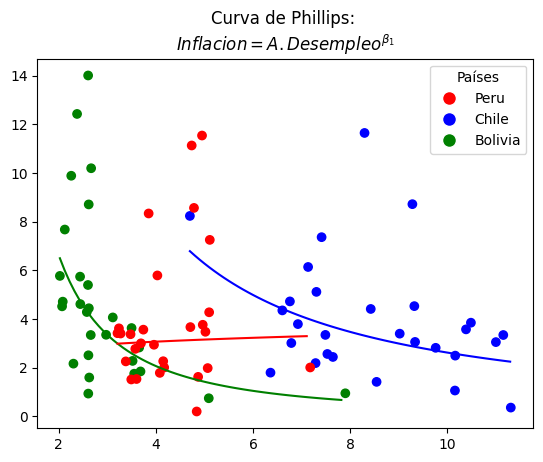

In [30]:
fig, ax = plt.subplots()
ax.scatter(y=df_combined['inflacion'],x=df_combined['desempleo'],c=df_combined['country'].map(colores))
ax.set_title(r'Curva de Phillips: ' + '\n' + r'$Inflacion = A.Desempleo^{\beta_1}$')
for i in range(0,3):
  ax.plot(x_range[i],np.exp(y_fit[i]),col[i])
ax.legend(handles=legend_handles, loc='upper right', title='Países')